In [36]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from os import walk

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

root_dir = "./data/"

In [47]:
list_files = []
for (dirpath, dirnames, filenames) in walk(root_dir):
    list_files.extend(filenames)
    break
    
list_df = []
for csv_file in list_files:
    list_df.append(pd.read_csv(f"{root_dir}{csv_file}", encoding="utf-8-sig"))
    
df_base = pd.concat(list_df)

In [48]:
df_kodex = df_base[(df_base["CD"] == "A122630") & (df_base["CVOL"] > 0)]
df_kodex.head()

,DT,DIV,CD,NM,TIMES,CPRICE,DIFF,CVOL,VOL
22,2022-04-12,실시간(장중 체결),A122630,KODEX 레버리지,90151,19065,-235,200,315878
35,2022-04-12,실시간(장중 체결),A122630,KODEX 레버리지,90151,19055,-245,200,316078
39,2022-04-12,실시간(장중 체결),A122630,KODEX 레버리지,90151,19060,-240,47,316125
63,2022-04-12,실시간(장중 체결),A122630,KODEX 레버리지,90152,19060,-240,1,316126
86,2022-04-12,실시간(장중 체결),A122630,KODEX 레버리지,90153,19060,-240,50,316176


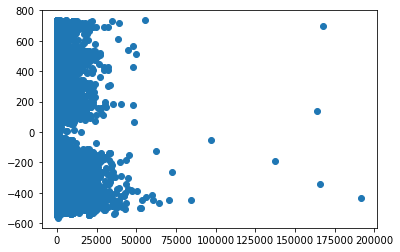

In [55]:
diff = np.array(df_kodex["DIFF"])
times = np.array(df_kodex["CVOL"])

plt.scatter(times, diff)
plt.show()

-0.0007129246784136357 -145.98964949440014 -0.006131914256949432 0.06862812274534492 0.00039152703046053315


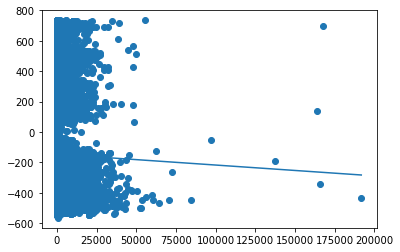

In [56]:
# Execute a method that returns some important key values of Linear Regression:
slope, intercept, r, p, std_err = stats.linregress(times, diff)
# The r value ranges from -1 to 1, where 0 means no relationship, and 1 (and -1) means 100% related.
# 'r'값은 0이면 관계가 없고 -1 또는 1이면 100% 관계가 있다는 것을 의미. 그러므로 '0.76'은 관계는 있지만 완벽하지는 않음을 의미한다.
print(slope, intercept, r, p, std_err)

# Create a function that uses the slope and intercept values to return a new value.
# This new value represents where on the y-axis the corresponding x value will be placed:
def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, times))

plt.scatter(times, diff)
plt.plot(times, mymodel)
plt.show()

In [17]:
# 10년된 차의 속도를 예측한다.
speed = myfunc(120000)

print(speed)

-418.40173687354184


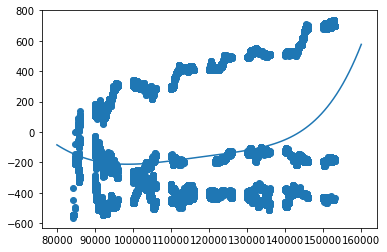

In [52]:
# 주어진 데이터에 곡선을 맞춤 표시
mymodel = np.poly1d(np.polyfit(CVOL, diff, 5))
# Then specify how the line will display, we start at position 1, and end at position 22:
myline = np.linspace(80000, 160000, 100)
# print(myline)

plt.scatter(times, diff)
plt.plot(myline, mymodel(myline))
plt.show()

In [35]:
mymodel(120000)

-392.05362877875086

In [53]:
df_last = df_kodex[df_kodex["DT"] == "2022-04-15"]
df_last.head()

,DT,DIV,CD,NM,TIMES,CPRICE,DIFF,CVOL,VOL
256,2022-04-15,실시간(예상 체결),A122630,KODEX 레버리지,84254,18880,-565,400,102657
291,2022-04-15,실시간(예상 체결),A122630,KODEX 레버리지,84311,19000,-445,1075,103732
294,2022-04-15,실시간(예상 체결),A122630,KODEX 레버리지,84312,19075,-370,4,103736
309,2022-04-15,실시간(예상 체결),A122630,KODEX 레버리지,84318,18900,-545,10,102783
311,2022-04-15,실시간(예상 체결),A122630,KODEX 레버리지,84319,18900,-545,2,102785


In [54]:
list_diff = np.array(df_last["DIFF"])
list_diff

array([-565, -445, -370, ..., -435, -435, -435])